In [1]:
# para PpostgresSQL
import psycopg2
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# con vulnerabilidad social escalada

In [2]:
# quitar notacion cientifica
pd.set_option('display.float_format', '{:.5f}'.format)
# parametros bd
database="sernapesca"
user="postgres"
password="admin"
host="127.0.0.1"
port="5432"

In [3]:
def get_raw_data():
    '''Funcion que devuelve la lista de nodos'''
    #Ingreso de parametros de conexion
    con = psycopg2.connect(database = database, user = user, 
                           password = password, host = host, port = port)
    #Creacion de conexion
    cur = con.cursor()
    #Ejecuta la conexion
    cur.execute(f''' 
                SELECT 
                    social.id, 
                    social.personas, 
                    social.pobl_depend,
                    economic.conteo_sii,
                    economic.conteo_plantas,
                    hazard.dist_hazard,
                    hazard.near_ccaa,
                    prob_hazard.hazard_prob,
                    response.prop_respuesta
                FROM 
                    capas_estaticas.social_vulnerability as social
                JOIN
                    capas_estaticas.economic_vulnerability as economic
                    USING(id)
                JOIN 
                    capas_estaticas.exposure_to_hazard as hazard
                    USING(id)
                JOIN 
                    capas_estaticas.probability_hazard as prob_hazard
                    USING(id)
                JOIN 
                    capas_estaticas.response_capacity as response
                    USING(id)
                '''
                )
    #Ordena la consulta
    table = cur.fetchall()
    print("Table of raw data created successfully")
    #Se cierra la conexion
    con.close()
    #Paso a Pandas DataFrame
    table = pd.DataFrame.from_records(table,
                                          columns = ['id','Población','Población dependiente','Cantidad empresas SII','Cantidad plantas','Distancia a amenaza','Cantidad CCAA cercanos','Probabilidad de amenaza','Proporción de respuesta'])
    return table

In [4]:
# se trae la consulta a la variable raw_data
raw_data = get_raw_data()
# fist rows
raw_data.head()

Table of raw data created successfully


,id,Población,Población dependiente,Cantidad empresas SII,Cantidad plantas,Distancia a amenaza,Cantidad CCAA cercanos,Probabilidad de amenaza,Proporción de respuesta
0,8708,245,80,2,0,18078.47298,30,0.00000,0.87500000000000000000
1,8709,0,0,0,0,39436.76508,14,0.00000,0
2,8710,0,0,0,0,35610.99132,2,0.00000,0
3,8711,0,0,0,0,30009.27336,4,0.00000,0
4,8712,0,0,1,0,28503.51778,2,0.00000,0.66666666666666666667


In [5]:
raw_data.describe()

,id,Distancia a amenaza,Cantidad CCAA cercanos,Probabilidad de amenaza
count,11047.00000,11045.00000,11047.00000,11047.00000
mean,50692.28741,33563.66285,8.25862,0.04277
std,28467.39390,22853.25095,27.82602,0.10374
min,8708.00000,0.00000,0.00000,0.00000
25%,11469.50000,19639.59388,0.00000,0.00000
50%,68979.00000,31052.83541,0.00000,0.00000
75%,71740.50000,47077.18597,4.00000,0.00000
max,74551.00000,136948.72496,318.00000,0.52158


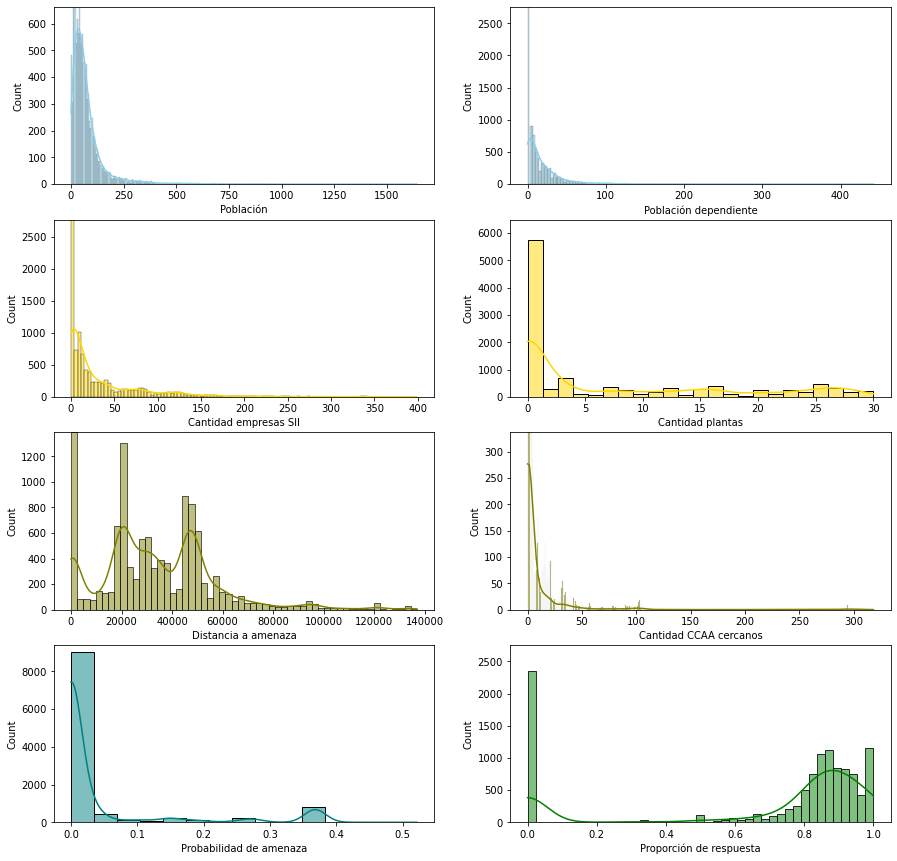

In [7]:
fig, axs = plt.subplots(4, 2, figsize=(15, 15))

max_counts = [raw_data[col].value_counts().max() for col in raw_data.columns]

sns.histplot(data=raw_data, x="Población", kde=True, color="skyblue", ax=axs[0, 0])
axs[0, 0].set_ylim([0, max_counts[1] + 200])

sns.histplot(data=raw_data, x="Población dependiente", kde=True, color="skyblue", ax=axs[0, 1])
axs[0, 1].set_ylim([0, max_counts[2]])

sns.histplot(data=raw_data, x="Cantidad empresas SII", kde=True, color="gold", ax=axs[1, 0])
axs[1, 0].set_ylim([0, max_counts[3]])

sns.histplot(data=raw_data, x="Cantidad plantas", kde=True, color="gold", ax=axs[1, 1])
axs[1, 1].set_ylim([0, max_counts[4] + 1000 ])

sns.histplot(data=raw_data, x="Distancia a amenaza", kde=True, color="olive", ax=axs[2, 0])
axs[2, 0].set_ylim([0, max_counts[5]+1000])

sns.histplot(data=raw_data, x="Cantidad CCAA cercanos", kde=True, color="olive", ax=axs[2, 1])
axs[2, 1].set_ylim([0, max_counts[6]-6000])

sns.histplot(data=raw_data, x="Probabilidad de amenaza", kde=True, color="teal", ax=axs[3, 0])
axs[3, 0].set_ylim([0, max_counts[7] +1000])

sns.histplot(data=raw_data, x="Proporción de respuesta", kde=True, color="green", ax=axs[3, 1])
axs[3, 1].set_ylim([0, max_counts[8]+400])

plt.show()

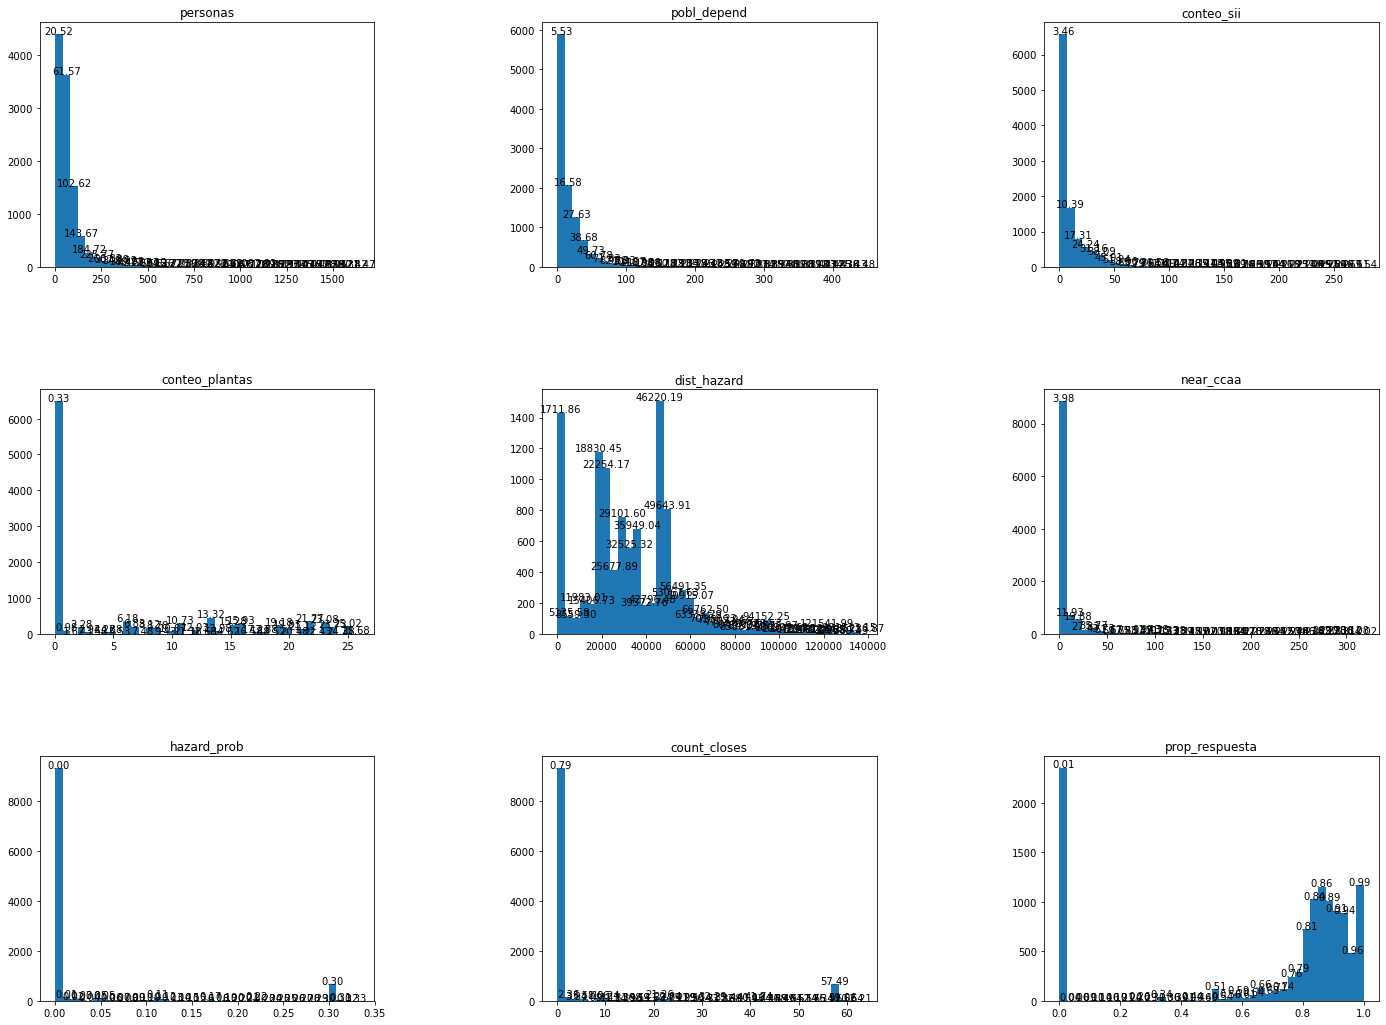

In [20]:
import matplotlib.pyplot as plt

# eliminando columna id
raw_data_cleaned = raw_data.drop(columns=['id'])
# convertir  data a float 
raw_data_cleaned = raw_data_cleaned.astype(float)

# Definir dimensiones de la grilla de gráficos
num_filas = 3
num_columnas = 3

# Calcular número total de gráficos
num_graficos = num_filas * num_columnas

# Crear figura y ejes
fig, axs = plt.subplots(num_filas, num_columnas, figsize=(24, 18))
fig.subplots_adjust(hspace=0.5, wspace=0.5)

# Iterar por cada columna y graficar histograma en el gráfico correspondiente
for i in range(num_graficos):
    fila = i // num_columnas
    columna = i % num_columnas
    if i < len(raw_data_cleaned.columns):
        n, bins, patches = axs[fila, columna].hist(raw_data_cleaned.iloc[:, i], bins=40)
        axs[fila, columna].set_title(raw_data_cleaned.columns[i])
        
        # Agregar etiquetas para cada bin
        bin_centers = 0.5 * (bins[:-1] + bins[1:])
        bin_labels = [f"{bin:.2f}" for bin in bin_centers]
        for label, patch in zip(bin_labels, patches):
            height = patch.get_height()
            axs[fila, columna].text(patch.get_x() + patch.get_width() / 2, height + 5, label, ha='center')
            
    else:
        # Si ya se han graficado todas las columnas, ocultar gráfico vacío
        axs[fila, columna].axis("off")

# Mostrar figura
plt.show()


In [29]:
raw_data=raw_data.apply(pd.to_numeric)

# calculate the quantiles
quantiles = raw_data.quantile([0.25, 0.5, 0.75, 1])

# print the result
print(quantiles)

                 id   personas  pobl_depend  conteo_sii  conteo_plantas  \
0.25000 11469.50000   27.00000      4.00000     0.00000         0.00000   
0.50000 68979.00000   52.00000     10.00000     4.00000         0.00000   
0.75000 71740.50000   87.00000     25.00000    14.00000        13.00000   
1.00000 74551.00000 1642.00000    442.00000   277.00000        26.00000   

         dist_hazard  near_ccaa  hazard_prob  prop_respuesta  
0.25000  19639.59388    0.00000      0.00000         0.65385  
0.50000  31052.83541    0.00000      0.00000         0.85222  
0.75000  47077.18597    4.00000      0.00000         0.91781  
1.00000 136948.72496  318.00000      0.35252         1.00000  


In [30]:
quantiles.to_csv('../resultados/resultados_3/quantiles.csv')

# sin vulnerabilidad social escalada [NO CORRER]

In [29]:
def get_raw_data():
    '''Funcion que devuelve la lista de nodos'''
    #Ingreso de parametros de conexion
    con = psycopg2.connect(database = database, user = user, 
                           password = password, host = host, port = port)
    #Creacion de conexion
    cur = con.cursor()
    #Ejecuta la conexion
    cur.execute(f''' 
                SELECT 
                    social.id, 
                    social.personas, 
                    social.pobl_depend,
                    economic.conteo_sii,
                    economic.conteo_plantas,
                    hazard.dist_hazard,
                    response.prop_respuesta
                FROM 
                    capas_estaticas.social_vulnerability as social
                JOIN
                    capas_estaticas.economic_vulnerability as economic
                    USING(id)
                JOIN 
                    capas_estaticas.exposure_to_hazard as hazard
                    USING(id)
                JOIN 
                    capas_estaticas.response_capacity as response
                    USING(id)
                '''
                )
    #Ordena la consulta
    table = cur.fetchall()
    print("Table of raw data created successfully")
    #Se cierra la conexion
    con.close()
    #Paso a Pandas DataFrame
    table = pd.DataFrame.from_records(table,
                                          columns = ['id','personas','pobl_depend','conteo_sii','conteo_plantas','dist_hazard','prop_respuesta'])
    return table

In [32]:
# se trae la consulta a la variable raw_data
raw_data = get_raw_data()
# fist rows
raw_data.head()

Table of raw data created successfully


,id,personas,pobl_depend,conteo_sii,conteo_plantas,dist_hazard,prop_respuesta
0,8708,245,80,2,0,18126.07067,0.87500000000000000000
1,8709,0,0,0,0,39523.35213,0
2,8710,0,0,0,0,35688.73283,0
3,8711,0,0,0,0,30060.52482,0
4,8712,0,0,1,0,28556.79870,0.66666666666666666667


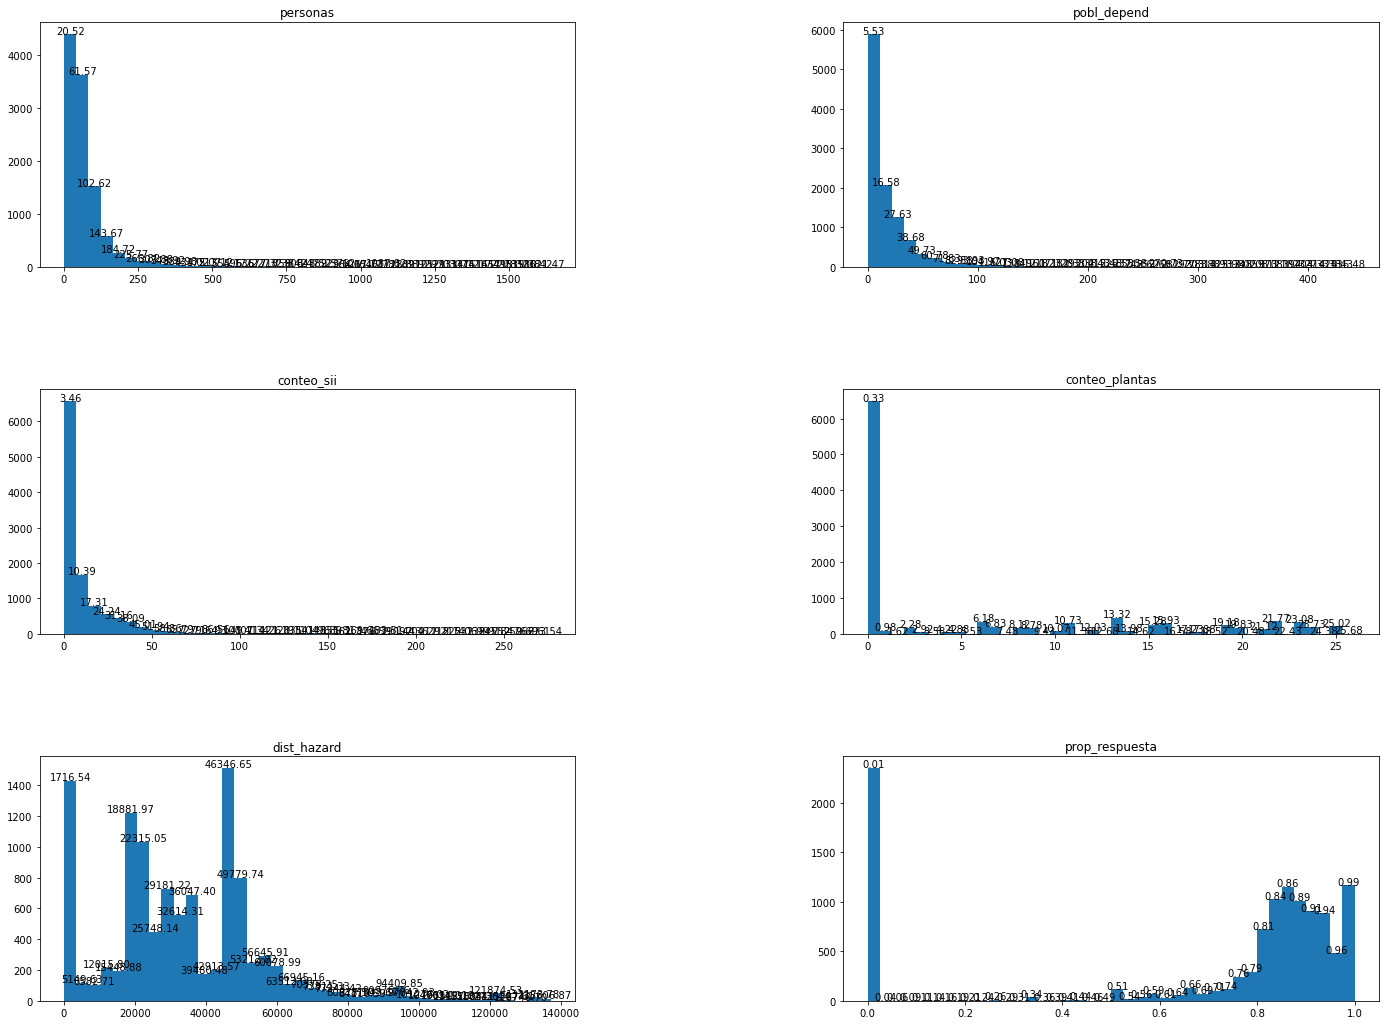

In [33]:
import matplotlib.pyplot as plt

# eliminando columna id
raw_data_cleaned = raw_data.drop(columns=['id'])
# convertir  data a float 
raw_data_cleaned = raw_data_cleaned.astype(float)

# Definir dimensiones de la grilla de gráficos
num_filas = 3
num_columnas = 2

# Calcular número total de gráficos
num_graficos = num_filas * num_columnas

# Crear figura y ejes
fig, axs = plt.subplots(num_filas, num_columnas, figsize=(24, 18))
fig.subplots_adjust(hspace=0.5, wspace=0.5)

# Iterar por cada columna y graficar histograma en el gráfico correspondiente
for i in range(num_graficos):
    fila = i // num_columnas
    columna = i % num_columnas
    if i < len(raw_data_cleaned.columns):
        n, bins, patches = axs[fila, columna].hist(raw_data_cleaned.iloc[:, i], bins=40)
        axs[fila, columna].set_title(raw_data_cleaned.columns[i])
        
        # Agregar etiquetas para cada bin
        bin_centers = 0.5 * (bins[:-1] + bins[1:])
        bin_labels = [f"{bin:.2f}" for bin in bin_centers]
        for label, patch in zip(bin_labels, patches):
            height = patch.get_height()
            axs[fila, columna].text(patch.get_x() + patch.get_width() / 2, height + 5, label, ha='center')
            
    else:
        # Si ya se han graficado todas las columnas, ocultar gráfico vacío
        axs[fila, columna].axis("off")

# Mostrar figura
plt.show()


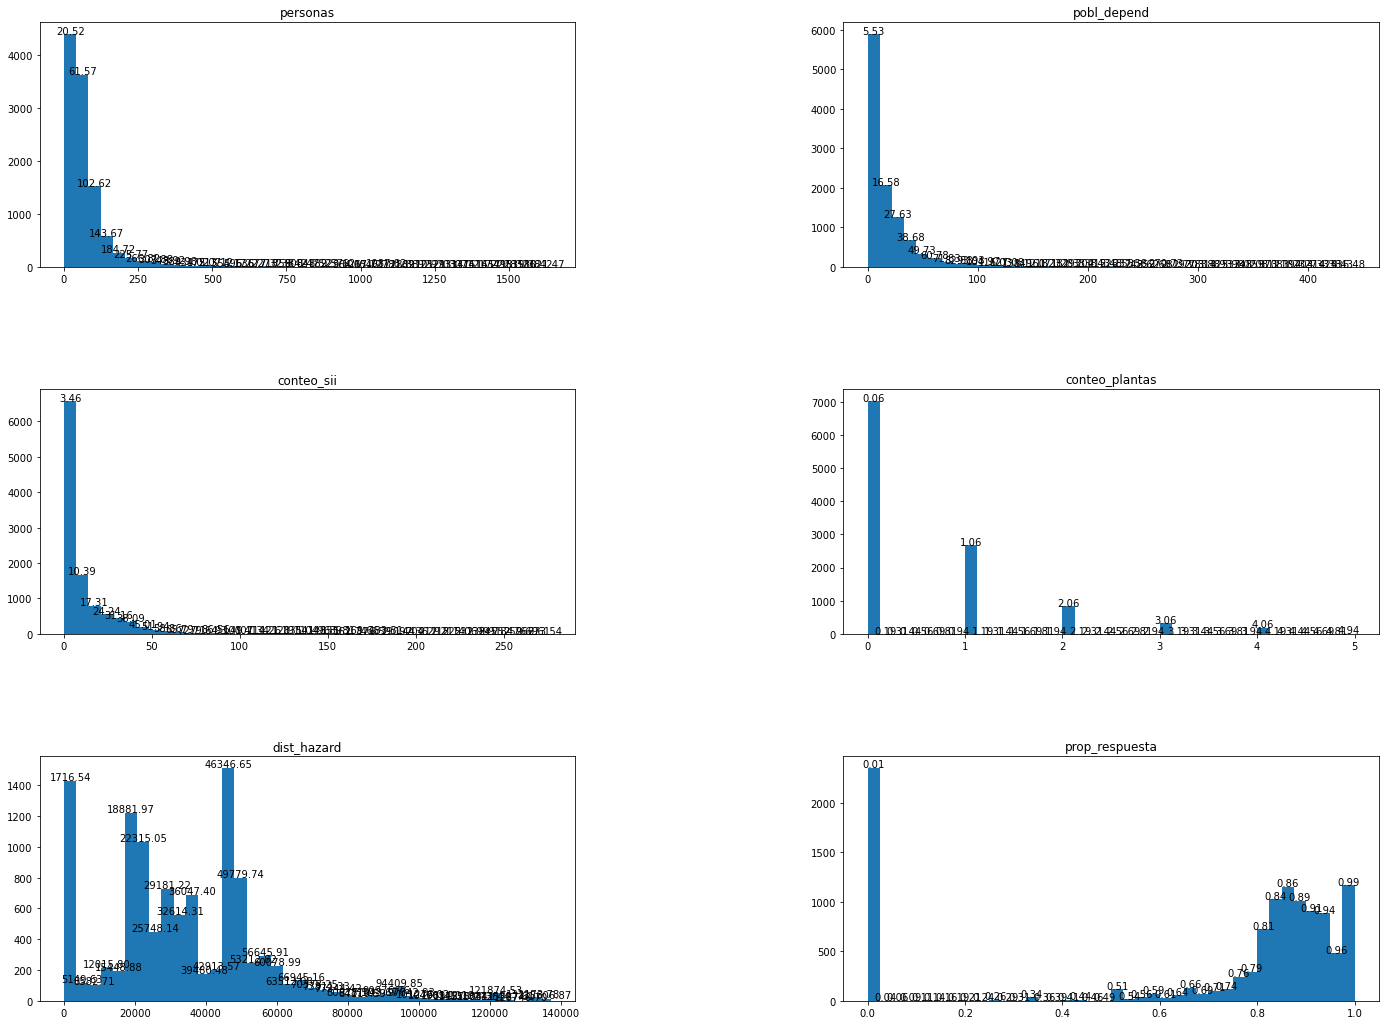

In [10]:
import matplotlib.pyplot as plt

# eliminando columna id
raw_data_cleaned = raw_data.drop(columns=['id'])
# convertir  data a float 
raw_data_cleaned = raw_data_cleaned.astype(float)

# Definir dimensiones de la grilla de gráficos
num_filas = 3
num_columnas = 2

# Calcular número total de gráficos
num_graficos = num_filas * num_columnas

# Crear figura y ejes
fig, axs = plt.subplots(num_filas, num_columnas, figsize=(24, 18))
fig.subplots_adjust(hspace=0.5, wspace=0.5)

# Iterar por cada columna y graficar histograma en el gráfico correspondiente
for i in range(num_graficos):
    fila = i // num_columnas
    columna = i % num_columnas
    if i < len(raw_data_cleaned.columns):
        n, bins, patches = axs[fila, columna].hist(raw_data_cleaned.iloc[:, i], bins=40)
        axs[fila, columna].set_title(raw_data_cleaned.columns[i])
        
        # Agregar etiquetas para cada bin
        bin_centers = 0.5 * (bins[:-1] + bins[1:])
        bin_labels = [f"{bin:.2f}" for bin in bin_centers]
        for label, patch in zip(bin_labels, patches):
            height = patch.get_height()
            axs[fila, columna].text(patch.get_x() + patch.get_width() / 2, height + 5, label, ha='center')
            
    else:
        # Si ya se han graficado todas las columnas, ocultar gráfico vacío
        axs[fila, columna].axis("off")

# Mostrar figura
plt.show()


/home/pedro/miniconda3/envs/risk_assess/lib/python3.8/site-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/home/pedro/miniconda3/envs/risk_assess/lib/python3.8/site-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/home/pedro/miniconda3/envs/risk_assess/lib/python3.8/site-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/home/pedro/miniconda3/envs/risk_assess/lib/python3.8/site-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/home/pedro/miniconda3/envs/risk_assess/lib/python3.8/site-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ign

IndexError: index 6 is out of bounds for axis 0 with size 6

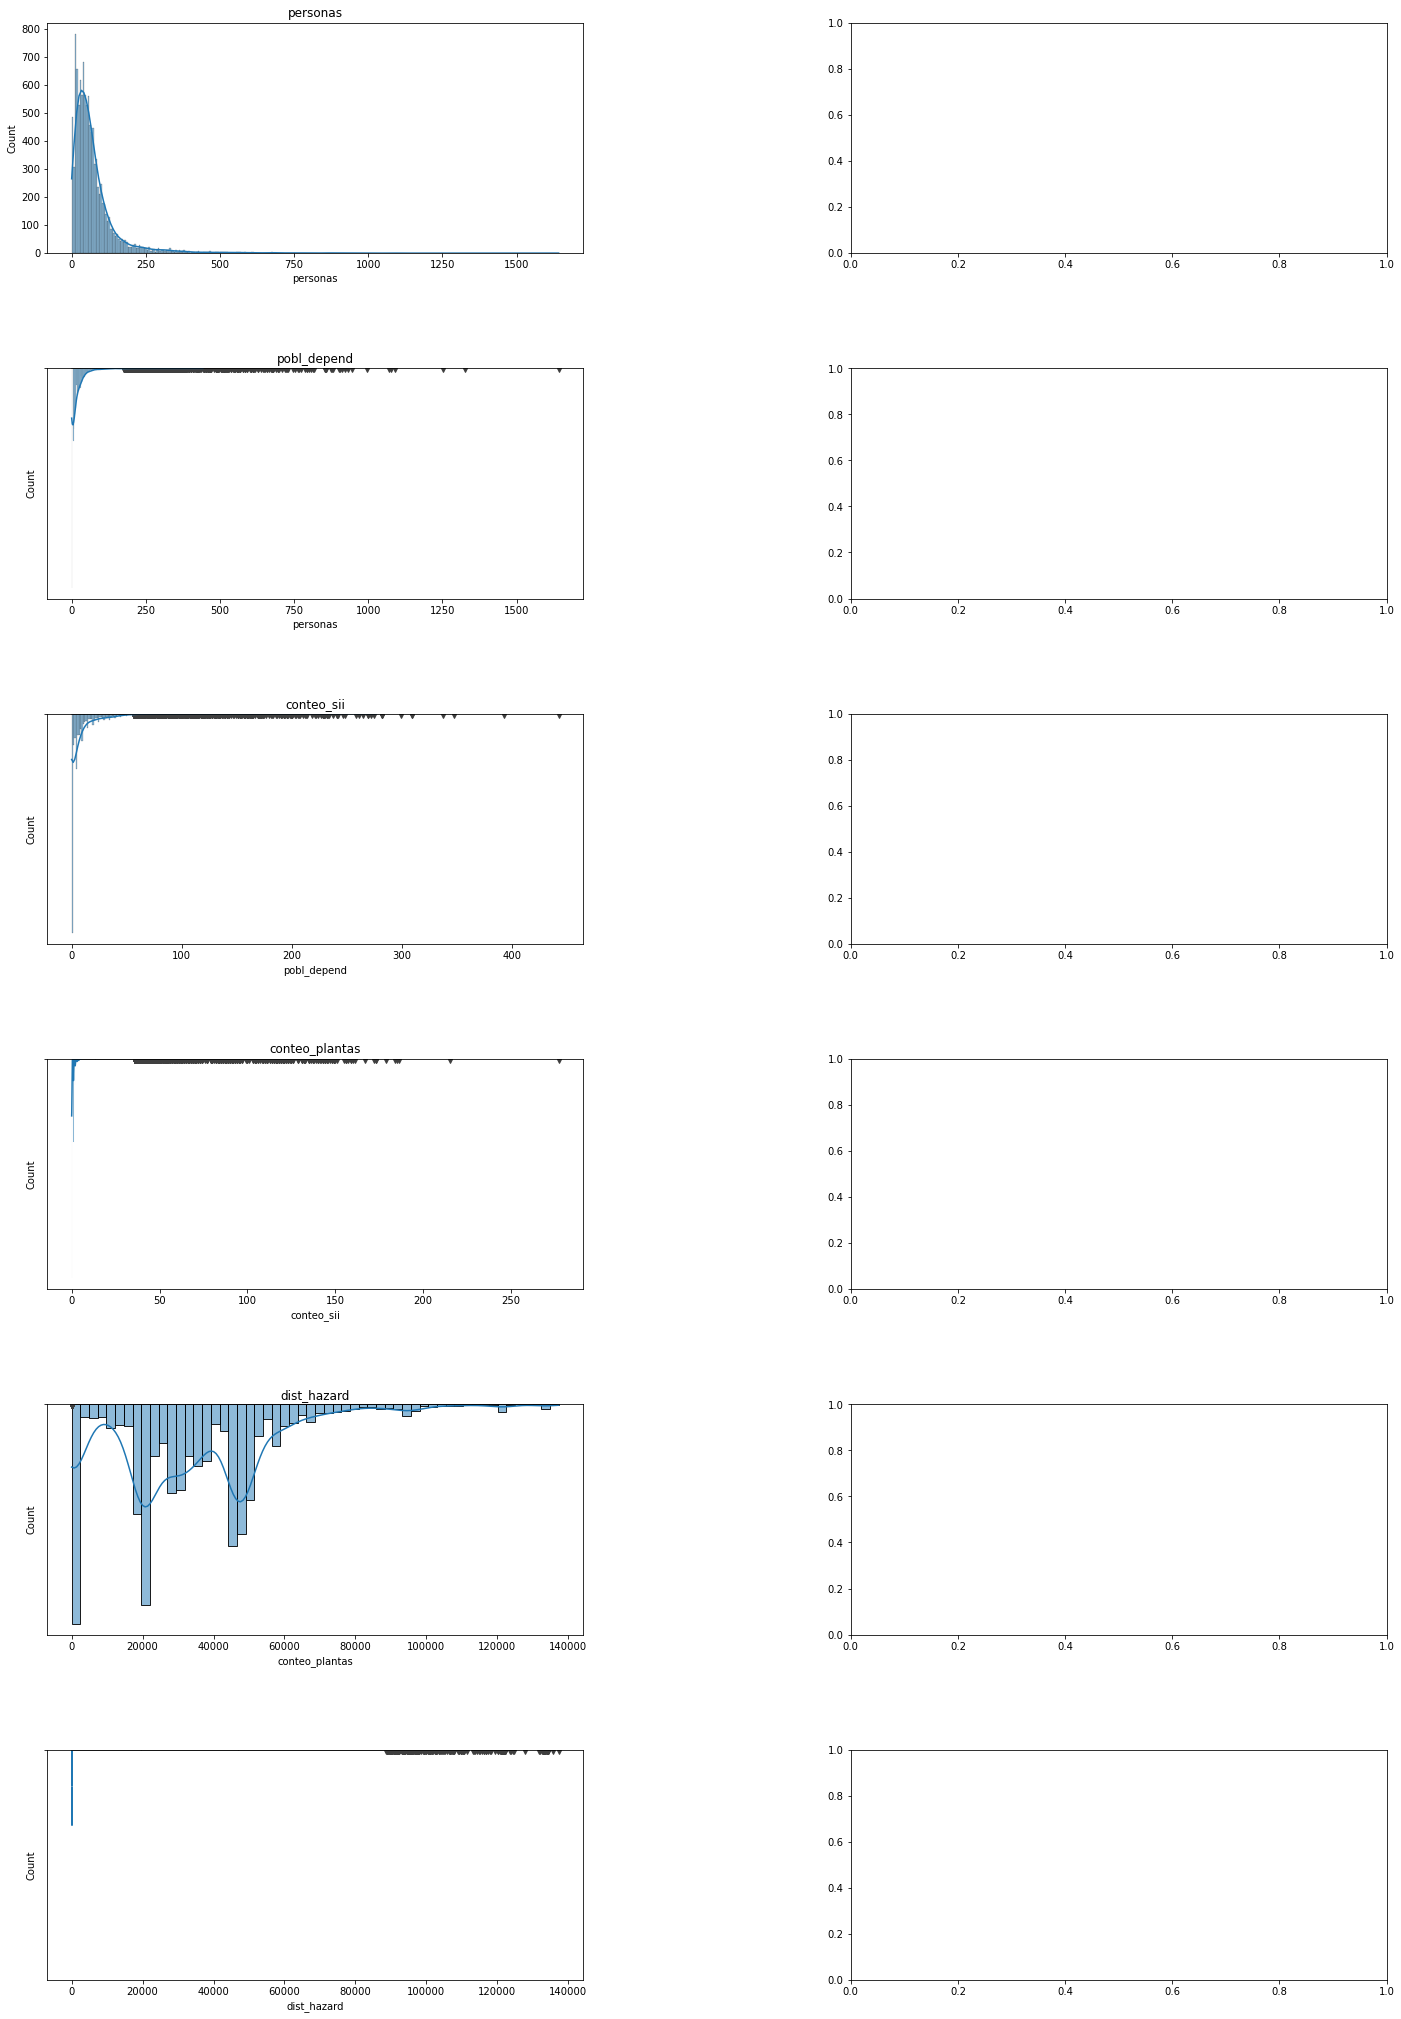

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Eliminar columna 'id'
raw_data_cleaned = raw_data.drop(columns=['id'])

# Convertir data a float 
raw_data_cleaned = raw_data_cleaned.astype(float)
# Definir dimensiones de la grilla de gráficos
num_filas = 6
num_columnas = 2

# Crear figura y ejes
fig, axs = plt.subplots(num_filas, num_columnas, figsize=(24, 36))
fig.subplots_adjust(hspace=0.5, wspace=0.5)

# Iterar por cada columna y graficar histograma y boxplot en el gráfico correspondiente
for i, col_name in enumerate(raw_data_cleaned.columns):
    fila = i * 2 // num_columnas
    columna = i * 2 % num_columnas
    sns.histplot(data=raw_data_cleaned, x=col_name, kde=True, ax=axs[fila, columna])
    sns.boxplot(data=raw_data_cleaned, x=col_name, ax=axs[fila+1, columna], orient="v")
    axs[fila, columna].set_title(col_name)

# Mostrar figura
plt.show()

In [34]:
# calculate the quantiles
quantiles = raw_data_cleaned.quantile([0.25, 0.5, 0.75, 1])

# print the result
print(quantiles)

          personas  pobl_depend  conteo_sii  conteo_plantas  dist_hazard  \
0.25000   27.00000      4.00000     0.00000         0.00000  19634.77653   
0.50000   52.00000     10.00000     4.00000         0.00000  31110.13655   
0.75000   87.00000     25.00000    14.00000        13.00000  47171.76327   
1.00000 1642.00000    442.00000   277.00000        26.00000 137323.41125   

         prop_respuesta  
0.25000         0.65385  
0.50000         0.85222  
0.75000         0.91781  
1.00000         1.00000  


In [42]:
raw_data_cleaned.describe()

,personas,pobl_depend,conteo_sii,conteo_plantas,dist_hazard,prop_respuesta
count,11047.00000,11047.00000,11047.00000,11047.00000,11047.00000,11047.00000
mean,74.68770,19.55146,11.41034,0.54947,33609.26256,0.68140
std,92.60758,29.81815,19.82364,0.88332,22908.42294,0.36752
min,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
25%,27.00000,4.00000,0.00000,0.00000,19634.77653,0.65385
50%,52.00000,10.00000,4.00000,0.00000,31110.13655,0.85222
75%,87.00000,25.00000,14.00000,1.00000,47171.76327,0.91781
max,1642.00000,442.00000,277.00000,5.00000,137323.41125,1.00000
